# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_excel('RP_arrival_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1748 non-null   float64
 1   Standoff distance  1748 non-null   float64
 2   Angle              1748 non-null   int64  
 3   Arrival time       1748 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 54.8 KB


In [3]:
dataset.head()

,Mass,Standoff distance,Angle,Arrival time
0,0.5,5.0,0,10.055926
1,0.5,5.0,15,10.536600
2,0.5,5.0,30,12.221524
3,0.5,5.0,45,15.898340
4,2.5,5.0,0,7.722725


In [4]:
y = dataset['Arrival time']
X = dataset.drop(['Arrival time'], axis=1)
print(X.shape, y.shape)

(1748, 3) (1748,)


In [5]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [7]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [8]:
ann = tf.keras.models.Sequential()

In [9]:
ann.add(tf.keras.layers.Dense(units=8,
                              input_shape=(X_train.shape[1],),
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=7,
                              activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(units=5,
                              activation='leaky_relu'))

In [10]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 7)                 63        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [13]:
# protects from unnecessary further training of the model
#if a particular metric does not continue to improve over a number of n epochs.
#In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [14]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
41/41 [==============================] - 1s 10ms/step - loss: 805.0848 - mae: 18.8838 - val_loss: 87.0186 - val_mae: 6.6681
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 40.6499 - mae: 4.4911 - val_loss: 23.3531 - val_mae: 3.3980
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 20.9149 - mae: 3.1281 - val_loss: 20.6270 - val_mae: 3.1856
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 18.6262 - mae: 2.9004 - val_loss: 19.4368 - val_mae: 2.9611
Epoch 5/500
41/41 [==============================] - 0s 3ms/step - loss: 17.6502 - mae: 2.8326 - val_loss: 19.2930 - val_mae: 2.9555
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 16.1852 - mae: 2.6965 - val_loss: 15.2985 - val_mae: 2.7088
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 14.9699 - mae: 2.5907 - val_loss: 16.2394 - val_mae: 2.6222
Epoch 8/500
41/41 [==============================] - 0s 3ms/step -

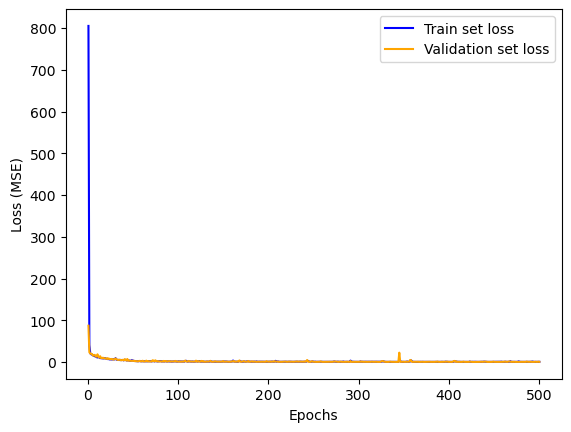

In [15]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Arrival_ANN1_2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

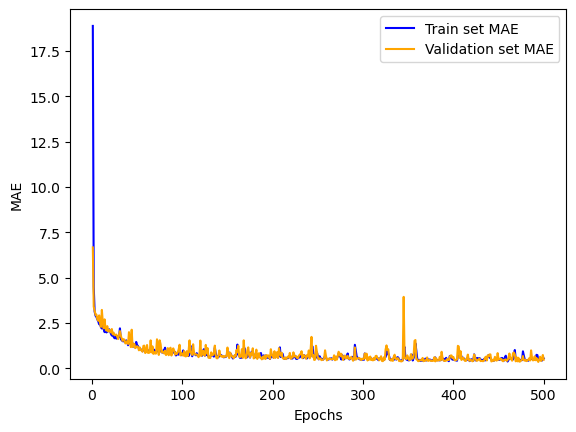

In [16]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Arrival_ANN1_3.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
print (epochs)

In [28]:
ann.save('Arrival_ANN1')

INFO:tensorflow:Assets written to: Arrival_ANN1\assets


# Part 4 - Make predictions

9/9 [==============================] - 0s 2ms/step


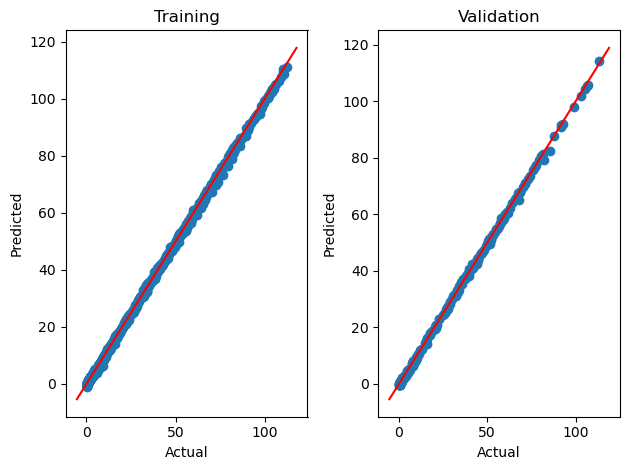

In [17]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Arrival_ANN1_1.png', dpi = 300, bbox_inches = 'tight')
# show the plot
plt.show()

In [18]:
y_pred = ann.predict(X_test)
#np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

9/9 [==============================] - 0s 2ms/step
[[ 2.91150284e+01  2.93336391e+01]
 [ 1.49768901e+00  1.92358600e+00]
 [ 4.21717873e+01  4.20926244e+01]
 [ 6.02103348e+01  6.06222116e+01]
 [-1.24186933e-01  5.68369400e-01]
 [ 3.40146124e-01  4.62171700e-01]
 [ 1.26027775e+00  1.61011000e+00]
 [ 4.79088440e+01  4.84344398e+01]
 [ 4.91204300e+01  5.02432067e+01]
 [ 2.17807484e+00  2.57813700e+00]
 [ 4.65909576e+01  4.68824591e+01]
 [ 7.91254578e+01  8.25451204e+01]
 [ 5.04185066e+01  5.03433899e+01]
 [ 2.85979042e+01  2.88707936e+01]
 [ 2.58819401e-01  3.61122400e-01]
 [ 2.00055027e+01  2.05101348e+01]
 [ 7.48238602e+01  7.53084952e+01]
 [ 1.27075262e+01  1.34930756e+01]
 [ 2.70849288e-01  3.66709500e-01]
 [ 2.66264439e+00  2.84897300e+00]
 [ 7.80084381e+01  7.79640825e+01]
 [ 1.12030888e+00  1.28016600e+00]
 [ 1.21341014e+00  1.51892300e+00]
 [ 1.72394538e+00  1.97516600e+00]
 [ 3.16202462e-01  5.29656500e-01]
 [ 3.73777771e+01  3.74959356e+01]
 [ 1.46870394e+01  1.50727016e+01]
 [ 9

Text(0, 0.5, 'Predicted data')

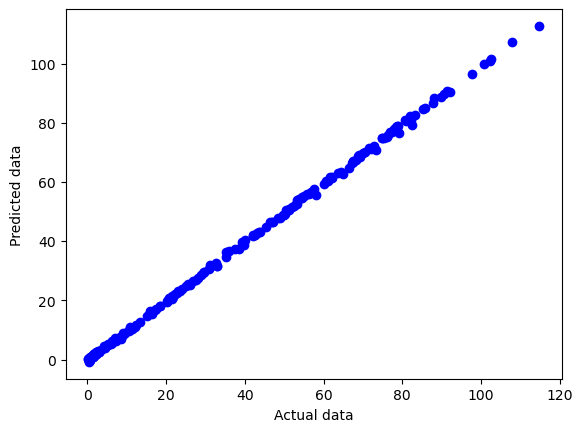

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.085],[0,0.085], color = "red")
#plt.axis ([0,0.085,0,0.085])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

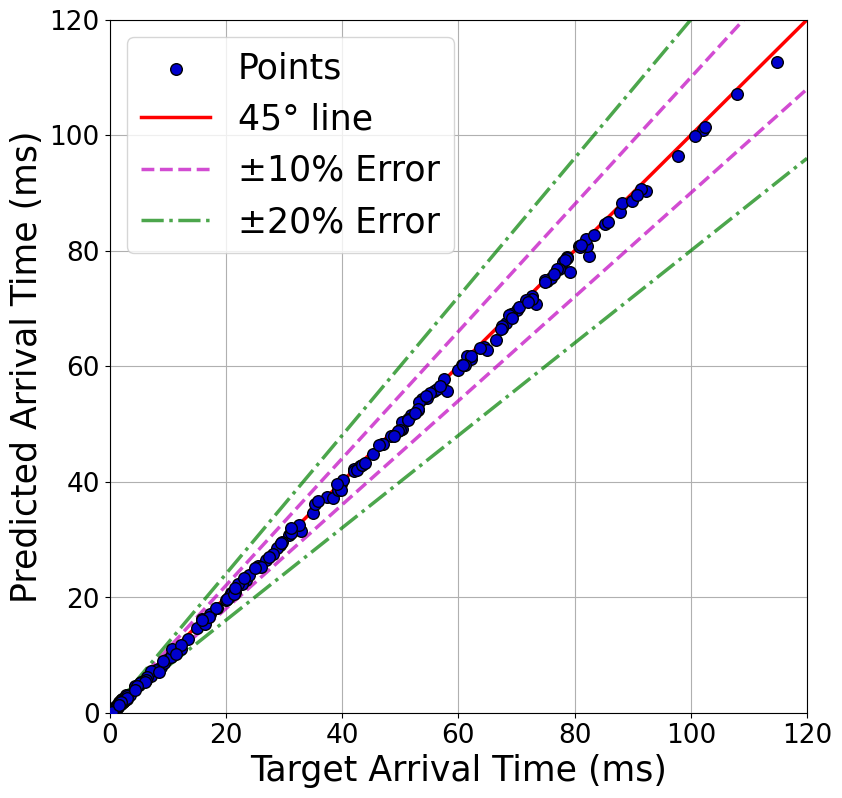

In [20]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Arrival Time (ms)',fontsize = 25)
plt.xlabel('Target Arrival Time (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,120)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 120)
plt.xlim(0, 120)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('Arrival_ANN1.png', dpi = 300, bbox_inches = 'tight')

In [21]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

39/39 [==============================] - 0s 2ms/step
0.49715518645665424
0.49437072722471076


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9995054123832163


In [23]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9994931283897842


In [24]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 68.82%
Within 20% margin 80.61%
Out of 20% margin 19.39%


In [25]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9994996835691223


In [26]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.6910888800614007

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.49437072722471076